In [1]:
using Revise,FileIO
y1,x1,y2,x2=load("dirori.jld","y1","x1","y2","x2")
rx1=deg2rad.(x1);rx2=deg2rad.(x2);

# Direction and Orientation Tuning Curve

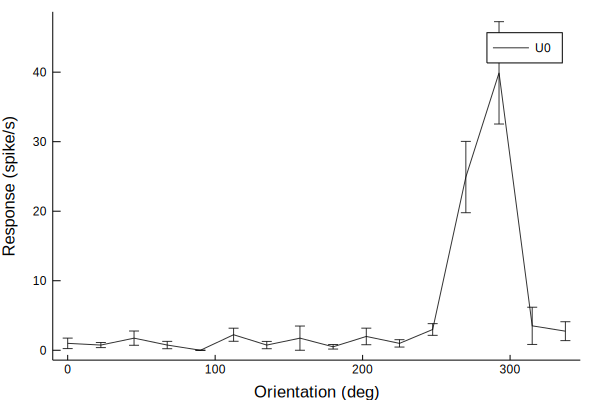

In [3]:
using NeuroAnalysis,DataFrames
plotcondresponse(y1,DataFrame(Orientation=x1),:Orientation)

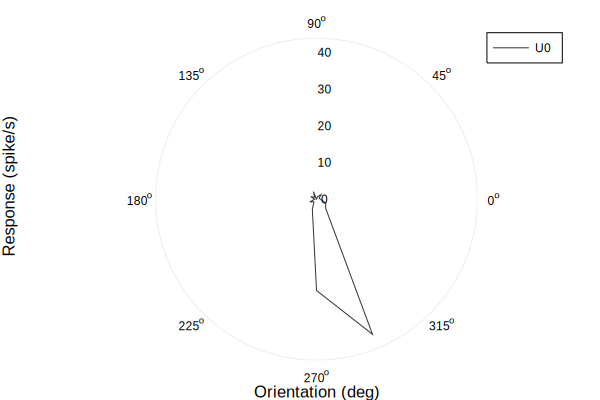

In [4]:
plotcondresponse(y1,DataFrame(Orientation=x1),:Orientation,projection=:polar)

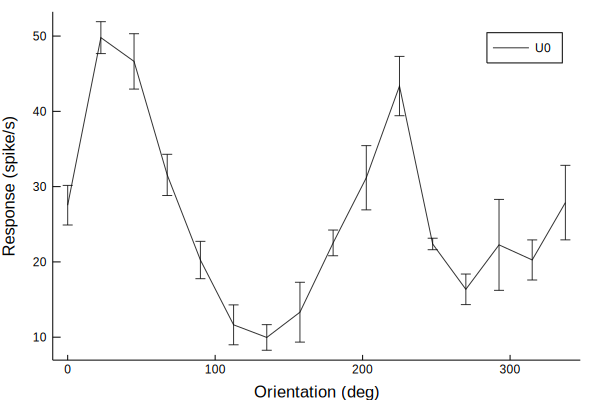

In [5]:
plotcondresponse(y2,DataFrame(Orientation=x2),:Orientation)

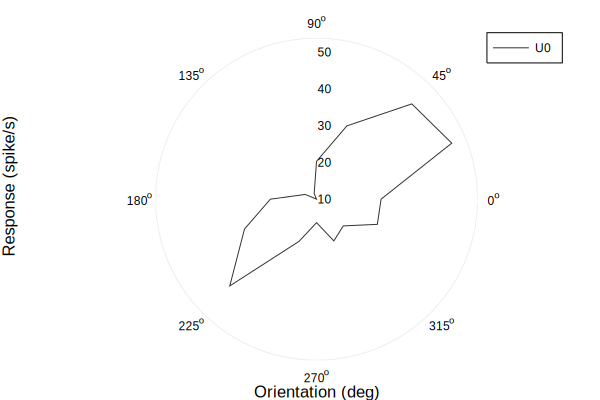

In [6]:
plotcondresponse(y2,DataFrame(Orientation=x2),:Orientation,projection=:polar)

# Circular Variance

In [7]:
d1=deg2rad(filter(x->x!=0,unique(diff(sort(x1))))[1]);d2=deg2rad(filter(x->x!=0,unique(diff(sort(x2))))[1])
arx1=circaxial.(rx1);arx2=circaxial.(rx2)
ad1=circaxial(d1);ad2=circaxial(d2);

In [8]:
DataFrame(dirvar1 = circvar(rx1,y1,d1),dirvar2 = circvar(rx2,y2,d2),orivar1 = circvar(arx1,y1,ad1),orivar2 = circvar(arx2,y2,ad2))

,dirvar1,dirvar2,orivar1,orivar2
,Float64,Float64,Float64,Float64
1,0.230787,0.880278,0.3012,0.732038


# von Mises and Generalized von Mises

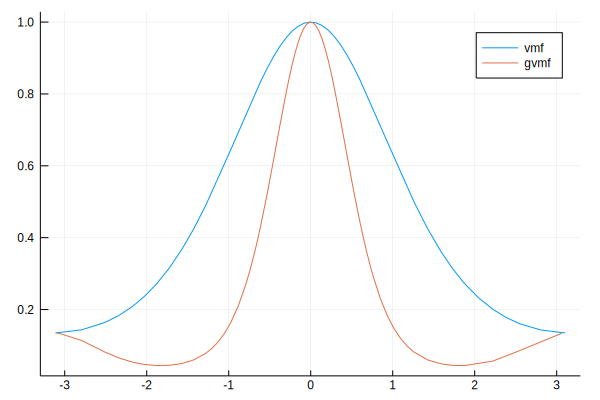

In [9]:
using Plots
plot([vmf,gvmf],-pi,pi,label=["vmf","gvmf"])

## GvM Model Fitting

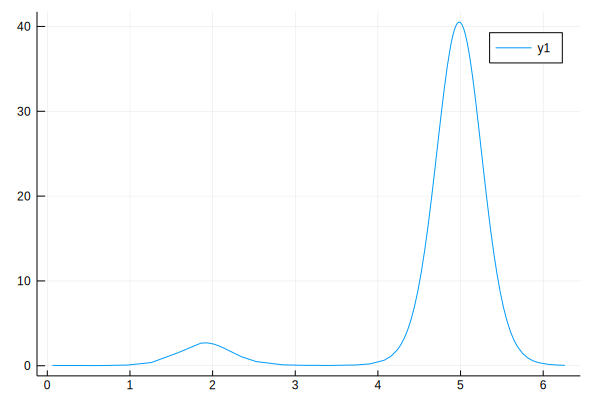

In [10]:
using LsqFit
gvmfit1 = curve_fit((x,p)->gvmf.(x,p...),rx1,y1,Float64[1,0,0,0,0])
plot(x->gvmf(x,gvmfit1.param...),0,2pi)

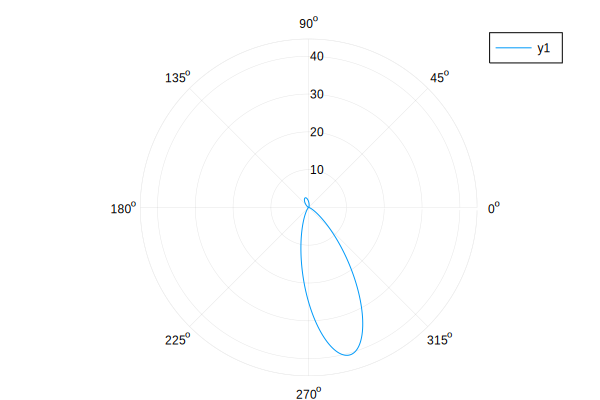

In [11]:
plot(x->gvmf(x,gvmfit1.param...),0:0.01:2pi,proj=:polar)

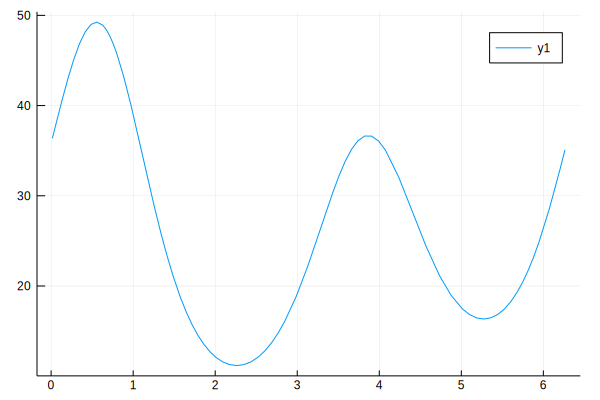

In [12]:
gvmfit2 = curve_fit((x,p)->gvmf.(x,p...),rx2,y2,Float64[1,0,0,0,0])
plot(x->gvmf(x,gvmfit2.param...),0,2pi)

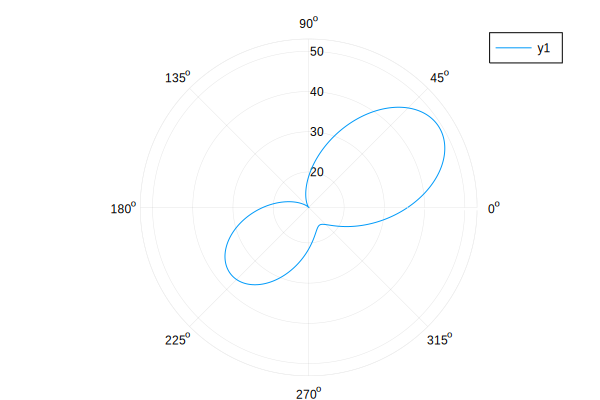

In [13]:
plot(x->gvmf(x,gvmfit2.param...),0:0.01:2pi,proj=:polar)

## vM Model Fitting

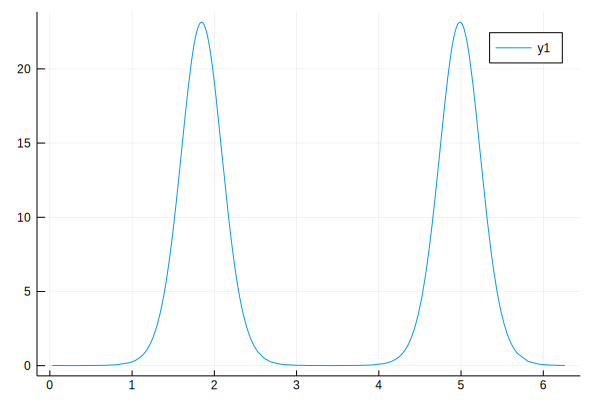

In [14]:
vmfit1 = curve_fit((x,p)->vmf.(x,p...,n=2),rx1,y1,Float64[1,0,0])
plot(x->vmf(x,vmfit1.param...,n=2),0,2pi)

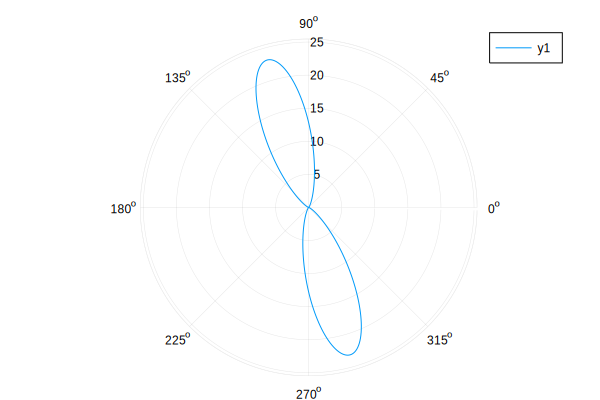

In [15]:
plot(x->vmf(x,vmfit1.param...,n=2),0:0.01:2pi,proj=:polar)

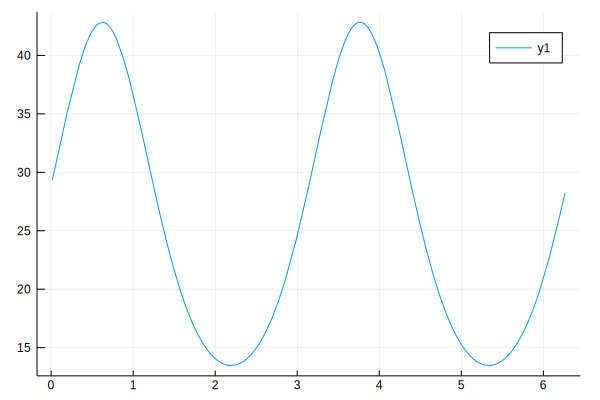

In [16]:
vmfit2 = curve_fit((x,p)->vmf.(x,p...,n=2),rx2,y2,Float64[1,0,0])
plot(x->vmf(x,vmfit2.param...,n=2),0,2pi)

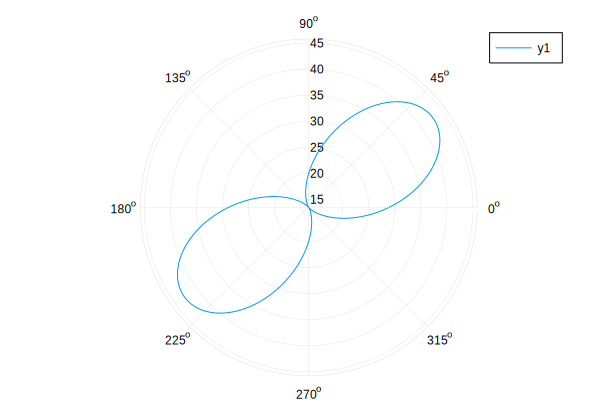

In [17]:
plot(x->vmf(x,vmfit2.param...,n=2),0:0.01:2pi,proj=:polar)